In [15]:
# import required packages-

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt
from mplsoccer import VerticalPitch

In [16]:
# Set input paramaters such as titles, colours and squad file.abs

team_name = "Aberdeen"

season_start = 2025

squadfile = 'aberdeen.csv'

colours = {
    "cl_background":"#000000",
    "cl_foreground":"#FFFFFF",
    "cl_secondary":"#999999",
    "cl_alt_1":"#d61f34",
    "cl_alt_2":"#3A86FF",
    "cl_alt_3":"#FFBE0B",
    "cl_alt_4":"#3EC300",
    "cl_alt_5":"#595959"}


title = "Squad depth for " + team_name + " season starting " + str(season_start) 
subtitle = "On basis of current date: " + datetime.datetime.now().strftime("%d/%m/%Y") + ". Primary expected position."

# Set Fonts
title_font = fnt.FontProperties(family="P052")
body_font = fnt.FontProperties(family="URW Gothic")

In [17]:
# read in and dispaly header of csv files to check.
squad = pd.read_csv(squadfile)
squad.head()


,First Name,Last Name,Date of Birth,Position,Contract Expiry,Status
0,Dimitar,Mitov,22/01/1997,GK,2027,N
1,Kristers,Tobers,13/12/2000,RCB,2028,N
2,Mats,Knoester,19/11/1998,LCB,2029,N
3,Gavin,Molloy,19/10/2001,LCB,2027,N
4,Jack,Milne,10/02/2003,RCB,2029,N


In [18]:
# Fromation file needs position names matching those in the squad CSV and x and y coordinates for each.
formation = pd.read_csv("formation.csv") 
formation.head()

,name,x,y
0,GK,50.0,5.0
1,RB,12.5,26.9
2,RCB,37.5,26.9
3,LCB,62.5,26.9
4,LB,87.5,26.9


In [19]:
def calculate_age(born, season_start):
    born_date = pd.to_datetime(born)
    start_date = datetime.datetime(season_start, 8,1)
    age = start_date.year - born_date.year - ((start_date.month, start_date.day) < (born_date.month, born_date.day))
    return age

In [20]:
# Calcualte age and contract length at start of season in questiond, set status to expiring for those with 1 year left.

squad["Date of Birth"] = pd.to_datetime(squad["Date of Birth"])
#squad["Age"] = calculate_age(squad["Date of Birth"],season_start)
squad["Years Remaining"] = squad["Contract Expiry"] - season_start

squad.loc[(squad["Years Remaining"] == 1) & (squad["Status"] == "N"), "Status"] = "E"

In [21]:
# Setup pitch

pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box', 
    half=False, 
    pitch_color=colours["cl_background"], 
    line_color=colours["cl_foreground"],
    linewidth=.75
    )


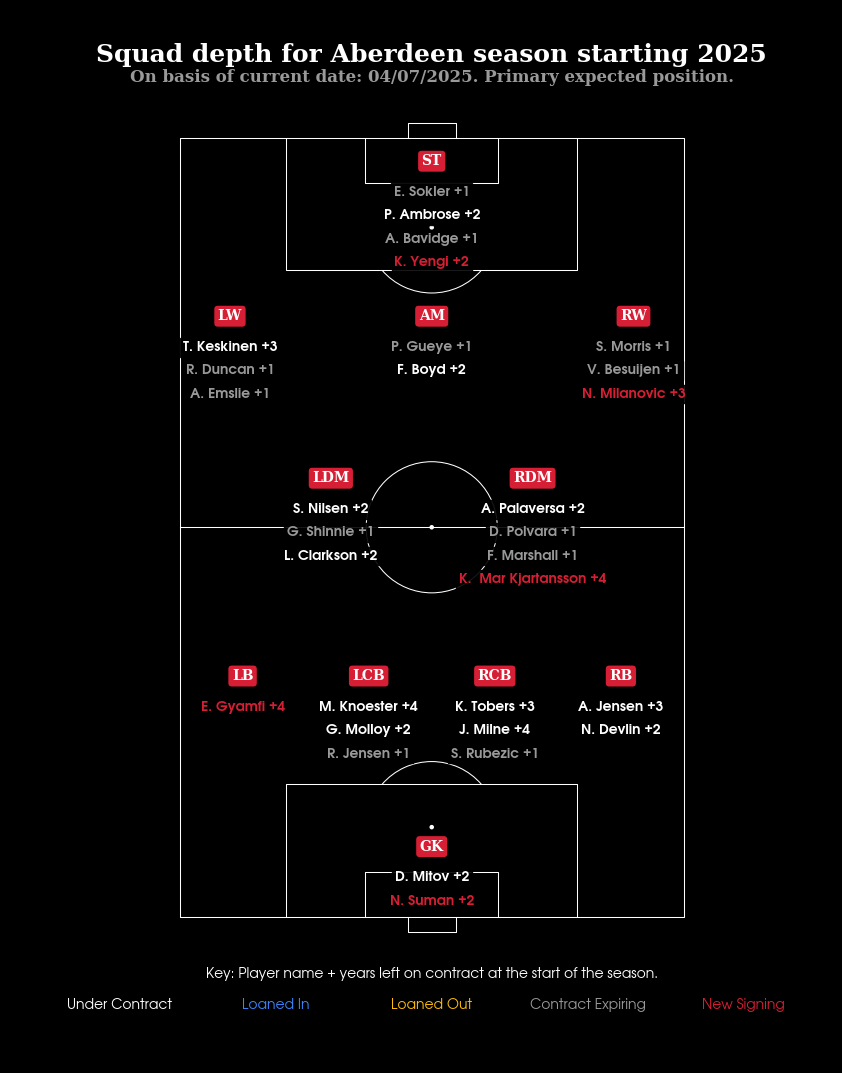

In [22]:
fig = plt.figure(figsize=(780/100,1024/100))
fig.patch.set_facecolor(colours["cl_background"])

# Add axis for header section, key and pitch
ax1 = fig.add_axes([0, 0.9, 1, .1], facecolor=colours["cl_background"])
ax2 = fig.add_axes([0, 0.1, 1, .8])
ax3 = fig.add_axes([0, 0, 1, .1], facecolor=colours["cl_background"])


# Place header, subheader and keys
ax1.text(
    x=0.5, 
    y=.55, 
    s=title, 
    fontsize=18, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_foreground"], 
    ha='center'
)

ax1.text(
    x=0.5, 
    y=.35, 
    s=subtitle, 
    fontsize=12, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_secondary"], 
    ha='center'
)

ax3.text(
    x=0.5, 
    y=.6, 
    s='Key: Player name + years left on contract at the start of the season.', 
    fontsize=10, 
    fontproperties=body_font,  
    color=colours["cl_foreground"], 
    ha='center'
)


plot_key = {
    'Under Contract': colours["cl_foreground"],
    'Loaned In':colours["cl_alt_2"],
    'Loaned Out':colours["cl_alt_3"],
    'Contract Expiring': colours["cl_secondary"],
    'New Signing':colours["cl_alt_1"]
}


i = 0

for key, key_colour in plot_key.items():

    ax3.text(
        x=0.1+i, 
        y=.3, 
        s=key, 
        fontsize=10, 
        fontproperties=body_font,   
        color=key_colour, 
        ha='center'
    )

    i = i+0.2

# Draw squad

status_colours = {
    'N': colours["cl_foreground"],
    'I':colours["cl_alt_2"],
    'O':colours["cl_alt_3"],
    'E': colours["cl_secondary"],
    'S':colours["cl_alt_1"]
}

pitch.draw(ax=ax2)

for row in formation.iterrows():
    
    
    ax2.text(
        x=row[1]["x"],
        y=row[1]["y"]+4,
        s=row[1]["name"],
        color=colours["cl_foreground"],
        bbox=dict(boxstyle="round", fc=colours["cl_alt_1"]),
        fontsize=10,
        fontweight='bold',
        fontproperties=title_font, 
        family='serif',
        ha='center',
        va='center'
    )
        
    # Iterate Through Squad List at Position and Plot Names.

    for player in enumerate(squad[(squad["Position"]==row[1]["name"]) & (squad["Years Remaining"]>0)].iterrows()):
        
        # Create String of Name and Years Remaining
        label = player[1][1]["First Name"][:1] + ". " +player[1][1]["Last Name"] + " +" + str(player[1][1]["Years Remaining"])
        
        ax2.text(
        x=row[1]["x"],
        y=row[1]["y"]-(3*(player[0])) , # Shift player name box down.
        s=label,
        color=status_colours[player[1][1]["Status"]],
        bbox=dict(boxstyle="square", fc=colours["cl_background"], alpha=0.9, pad =0.2),
        fontsize=10,
        fontproperties=body_font,  
        fontweight='semibold',
        ha='center',
        va='center'
        )

fig.savefig((team_name + "_" + str(season_start)+".png"))

